In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
usecols = [
    # 'BindingDB Reactant_set_id',
    # 'Ligand SMILES',
    # 'Ligand InChI',
    # 'Ligand InChI Key',
    # 'BindingDB MonomerID',
    # "BindingDB Ligand Name",
    # "Target Name",
    # "Target Source Organism According to Curator or DataSource",
    # # 'Ki (nM)',
    # # 'IC50 (nM)',
    # # 'Kd (nM)',
    # # 'EC50 (nM)',
    # # 'kon (M-1-s-1)',
    # # 'koff (s-1)',
    # # 'pH',
    # # 'Temp (C)',
    # "Curation/DataSource",
    "Article DOI",
    # 'BindingDB Entry DOI',
    "PMID",
    # # 'PubChem AID',
    # "Patent Number",
    # "Authors",
    # "Institution",
    # 'Link to Ligand in BindingDB',
    # 'Link to Target in BindingDB',
    # 'Link to Ligand-Target Pair in BindingDB',
    # 'Ligand HET ID in PDB',
    # 'PDB ID(s) for Ligand-Target Complex',
    # 'PubChem CID',
    # 'PubChem SID',
    "ChEBI ID of Ligand",
    "ChEMBL ID of Ligand",
    "DrugBank ID of Ligand",
    "IUPHAR_GRAC ID of Ligand",
    "KEGG ID of Ligand",
    "ZINC ID of Ligand",
    # 'Number of Protein Chains in Target (>1 implies a multichain complex)',
    # 'BindingDB Target Chain Sequence',
    # 'PDB ID(s) of Target Chain',
    # 'UniProt (SwissProt) Recommended Name of Target Chain',
    # 'UniProt (SwissProt) Entry Name of Target Chain',
    "UniProt (SwissProt) Primary ID of Target Chain",
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    "UniProt (TrEMBL) Primary ID of Target Chain",
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [10]:
df = pd.read_csv(
    r"../data/BindingDB_All.tsv",
    sep="\t",
    # nrows=1e4,
    usecols=usecols,
    # usecols=['IUPHAR_GRAC ID of Ligand'],
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_11451/3936161308.py:1: DtypeWarning: Columns (17,32,33,35,36,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [15]:
df_counts = df["UniProt (SwissProt) Primary ID of Target Chain"].value_counts()
df_counts

UniProt (SwissProt) Primary ID of Target Chain
P07949    26940
O60674    26019
P00533    24251
Q06187    23250
O60885    21409
          ...  
P0A879        1
Q9Y6I4        1
Q8TEY7        1
P12318        1
Q7Z5W3        1
Name: count, Length: 6532, dtype: int64

<Axes: >

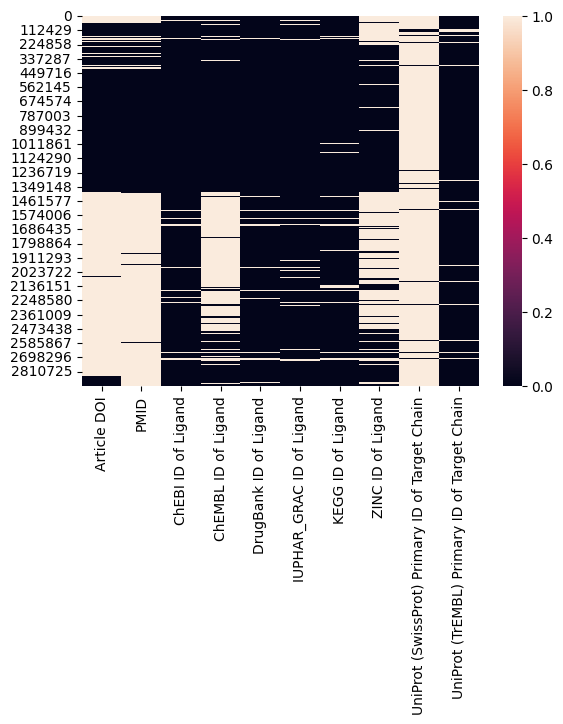

In [12]:
sns.heatmap(df.notna())

In [14]:
df["UniProt (TrEMBL) Primary ID of Target Chain"].unique()

array([nan, 'I7AKP2', 'Q3LG62', ..., 'A0A3F3IEK2', 'Q0PJ46', 'Q56D22'],
      dtype=object)

In [21]:
import requests
import tqdm
from tqdm.notebook import tqdm_notebook


# diseases = [
#     [
#         comment.get("disease", {}).get("diseaseId")
#         for comment in requests.get(f"https://www.uniprot.org/uniprotkb/{id}.json")
#         .json()
#         .get("comments", [])
#         if comment["commentType"] == "DISEASE"
#         if comment.get("disease") is not None
#     ]
#     for id in tqdm_notebook(df_counts.index)
# ]

diseases = {}
for id in tqdm_notebook(
    df["UniProt (SwissProt) Primary ID of Target Chain"].value_counts().index
):
    r = requests.get(f"https://www.uniprot.org/uniprotkb/{id}.json").json()
    diseases_per_id = []
    for comment in r.get("comments", []):
        if (comment["commentType"] == "DISEASE") and (
            comment.get("disease") is not None
        ):
            diseaseID = comment.get("disease").get("diseaseId")
            if diseaseID is not None:
                diseases_per_id.append(diseaseID)

    for keyword in r.get("keywords", []):
        if keyword["category"].lower() == "disease":
            diseases_per_id.append(keyword["name"])

    diseases.update({id: diseases_per_id})

  0%|          | 0/6532 [00:00<?, ?it/s]

In [22]:
# 1677

In [23]:
nb_empty = 0
for i, disease in enumerate(diseases.values()):
    if disease == []:
        nb_empty += 1
        print(df_counts.index[i])

nb_empty / df_counts.shape[0] * 100

P14416
P56817
Q13547
P24941
O43614
P34972
P00915
P35372
Q07820
Q99572
O43613
Q92918
P29274
P41145
P56373
P0DTD1
P28223
P22303
P27338
Q16539
P41143
P0DMS8
O42275
O75116
Q9NR96
P21453
P30542
P61169
Q16790
P35354
P31645
P35414
O14744
P10635
P29275
P14902
P09874
P43490
Q8NER1
P27487
P19327
P28335
Q9Y5N1
Q07343
P50406
P11712
P23977
P18031
P81908
P31652
Q9NZQ7
P33535
P42338
P41594
Q07869
Q99705
P34969
Q9Y5Y4
P25099
Q99685
P03956
P22455
P06493
P38532
O00763
P14842
O60563
O15379
P11229
P21917
P05177
P09917
Q14416
Q92769
Q96GD4
Q99500
P30543
Q13464
P25774
P41146
P23219
P06401
P25103
O14842
Q01064
P55055
P33261
P34913
P25090
P07550
P35408
P31424
Q9Y5Z0
P05979
Q07817
Q60492
P07711
Q64663
P43220
P23743
P41144
P21728
P33533
P13612
O00519
P41595
Q03181
P07900
P20272
O35433
P08173
Q05397
O76074
P35348
P24387
Q99683
O14684
P97612
Q06418
Q7Z3E1
Q14164
P10980
Q923Y8
P31153
Q9H3N8
P10520
P21462
P35367
P56718
C7C422
P43116
Q9HBH9
P53350
O15530
P37288
P06870
P23443
P34998
P42574
Q86X55
Q14833
Q70CQ3
P33981

77.14329454990815

In [24]:
import json

with open("UniprotID_disases.json", "w") as f:
    json.dump(diseases, f)

In [25]:
from collections import Counter
from itertools import chain

# sns.countplot(pd.DataFrame(chain.from_iterable(diseases), columns=["dis"]), x="dis")

In [38]:
df_counts, diseases

(UniProt (SwissProt) Primary ID of Target Chain
 P07949    26940
 O60674    26019
 P00533    24251
 Q06187    23250
 O60885    21409
           ...  
 P0A879        1
 Q9Y6I4        1
 Q8TEY7        1
 P12318        1
 Q7Z5W3        1
 Name: count, Length: 6532, dtype: int64,
 [['Hirschsprung disease 1',
   'Medullary thyroid carcinoma',
   'Multiple neoplasia 2B',
   'Pheochromocytoma',
   'Multiple neoplasia 2A',
   'Disease variant',
   'Hirschsprung disease',
   'Proto-oncogene'],
  ['Budd-Chiari syndrome',
   'Polycythemia vera',
   'Thrombocythemia 3',
   'Myelofibrosis',
   'Leukemia, acute myelogenous',
   'Disease variant',
   'Proto-oncogene'],
  ['Lung cancer',
   'Inflammatory skin and bowel disease, neonatal, 2',
   'Disease variant',
   'Proto-oncogene'],
  ['X-linked agammaglobulinemia',
   'Growth hormone deficiency, isolated, 3, with agammaglobulinemia',
   'Disease variant',
   'Dwarfism'],
  ['Cornelia de Lange syndrome 6',
   'Disease variant',
   'Intellectual disa

<Axes: xlabel='count', ylabel='dis'>

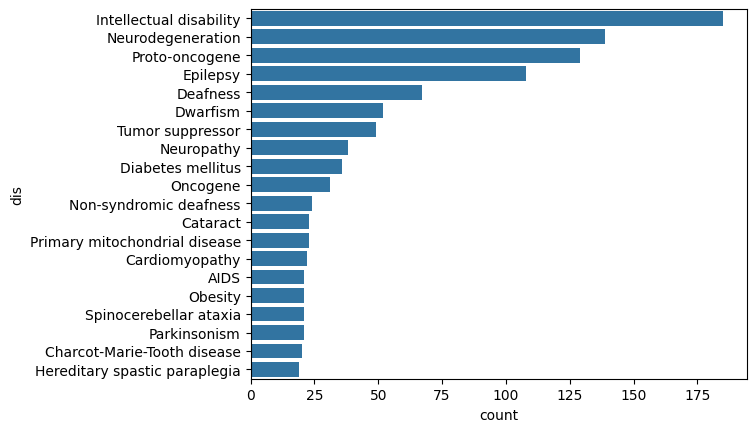

In [31]:
df_2 = (
    pd.DataFrame(chain.from_iterable(diseases), columns=["dis"])
    .value_counts()
    .reset_index()
    .drop(index=0)  # Remove "Disease Variant"
)


sns.barplot(df_2, y="dis", x="count", order=df_2["dis"][:20])

In [53]:
df_counts_ = df_counts.to_frame().reset_index()
df_counts_["diseases"] = diseases.values()
df_counts_["diseases_count"] = df_counts_["diseases"] * df_counts_["count"]
df_counts_

,UniProt (SwissProt) Primary ID of Target Chain,count,diseases,diseases_count
0,P07949,26940,"[Hirschsprung disease 1, Medullary thyroid car...","[Hirschsprung disease 1, Medullary thyroid car..."
1,O60674,26019,"[Budd-Chiari syndrome, Polycythemia vera, Thro...","[Budd-Chiari syndrome, Polycythemia vera, Thro..."
2,P00533,24251,"[Lung cancer, Inflammatory skin and bowel dise...","[Lung cancer, Inflammatory skin and bowel dise..."
3,Q06187,23250,"[X-linked agammaglobulinemia, Growth hormone d...","[X-linked agammaglobulinemia, Growth hormone d..."
4,O60885,21409,"[Cornelia de Lange syndrome 6, Disease variant...","[Cornelia de Lange syndrome 6, Disease variant..."
...,...,...,...,...
6527,P0A879,1,[],[]
6528,Q9Y6I4,1,[],[]
6529,Q8TEY7,1,[],[]
6530,P12318,1,[],[]


<Axes: xlabel='count', ylabel='disesase'>

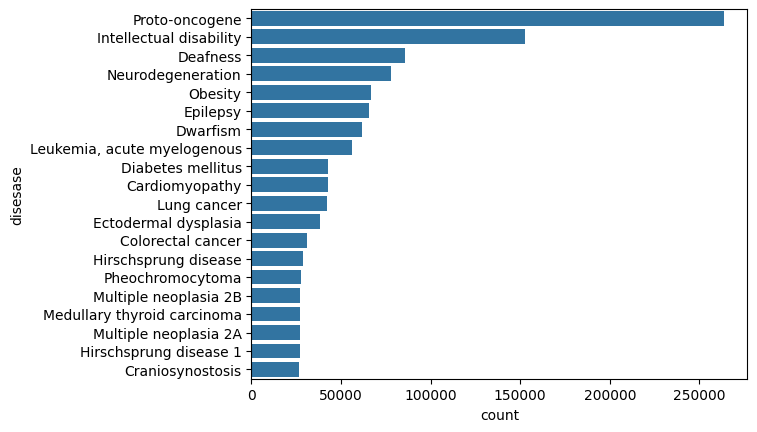

In [61]:
df_3 = (
    pd.DataFrame(
        chain.from_iterable(df_counts_["diseases_count"]), columns=["disesase"]
    )
    .value_counts()
    .reset_index()
    .drop(index=0)  # Remove "Disease Variant"
)


sns.barplot(df_3, y="disesase", x="count", order=df_3["disesase"][:20])